In [3]:
# Set up
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data: Obtaining the Dataframe

**There is no reason to run this code because I've already attached the cleaned dataframes here: https://drive.google.com/drive/folders/18TLoxa0RWNzmLL5ydh3c_8g5ttuPrdPB?usp=sharing. This code was used in a different notebook just for data-cleaning.**

In [2]:
# All starbucks locations in New York City Area (includes Long Island)
df = pd.read_json('/content/drive/MyDrive/SML312/locations.json')

In [3]:
# View dataframe
df

,city,name,country,longitude,latitude,storeId,storeHours
0,Brooklyn,Target Brooklyn College,US,-73.947243,40.631264,6551,"{'sunday': '8:00 AM to 9:00 PM', 'monday': '8:..."
1,Kew Gardens,118-24 Queens Blvd,US,-73.831879,40.714371,6348,"{'sunday': '6:00 AM to 8:00 PM', 'monday': '5:..."
2,New York,88th & Broadway,US,-73.975327,40.789288,6590,"{'sunday': '6:30 AM to 6:30 PM', 'monday': '5:..."
3,New York,42nd & 2nd,US,-73.972801,40.749783,6869,NaN
4,New York,NHL store @ 47th & Sixth,US,-73.982452,40.757786,6945,NaN
...,...,...,...,...,...,...,...
316,New York,10 Waverly Place,US,-73.994263,40.729984,1015672,NaN
317,New York,85th & Madison,US,-73.959564,40.780136,1015661,"{'sunday': '5:00 AM to 8:30 PM', 'monday': '5:..."
318,Brooklyn,7th Ave and 9th St,US,-73.981781,40.666855,1015924,"{'sunday': '6:00 AM to 9:00 PM', 'monday': '5:..."
319,New York,93rd & Second,US,-73.948372,40.782776,1015899,"{'sunday': '5:30 AM to 7:30 PM', 'monday': '5:..."


#### Associate to zip codes

In [ ]:
from geopy.geocoders import Nominatim

def get_zip_code(latitude, longitude):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    if 'postcode' in address:
        return address['postcode']
    else:
        return None

# Define the function to get zip code
def get_zip_code(latitude, longitude):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    # Extract the zip code
    if 'postcode' in address:
        return address['postcode']
    else:
        return None

def get_zip_code_for_row(row):
    return get_zip_code(row['latitude'], row['longitude'])

df['zip_code'] = df.apply(get_zip_code_for_row, axis=1)

df.to_csv('SML312_zipcodes_starbucks_locations.csv', index=False)

GeocoderInsufficientPrivileges: Non-successful status code 403

In [4]:
# data now found in SML312_zipcodes_starbucks_locations.csv
starbucks_locations_df = pd.read_csv('/content/drive/MyDrive/SML312/SML312_zipcodes_starbucks_locations.csv')

In [5]:
starbucks_locations_df

,city,name,country,longitude,latitude,storeId,storeHours,zip_code
0,Brooklyn,Target Brooklyn College,US,-73.947243,40.631264,6551,"{'sunday': '8:00 AM to 9:00 PM', 'monday': '8:...",11210
1,Kew Gardens,118-24 Queens Blvd,US,-73.831879,40.714371,6348,"{'sunday': '6:00 AM to 8:00 PM', 'monday': '5:...",11375
2,New York,88th & Broadway,US,-73.975327,40.789288,6590,"{'sunday': '6:30 AM to 6:30 PM', 'monday': '5:...",10024
3,New York,42nd & 2nd,US,-73.972801,40.749783,6869,NaN,10017
4,New York,NHL store @ 47th & Sixth,US,-73.982452,40.757786,6945,NaN,10019
...,...,...,...,...,...,...,...,...
316,New York,10 Waverly Place,US,-73.994263,40.729984,1015672,NaN,10011
317,New York,85th & Madison,US,-73.959564,40.780136,1015661,"{'sunday': '5:00 AM to 8:30 PM', 'monday': '5:...",10028
318,Brooklyn,7th Ave and 9th St,US,-73.981781,40.666855,1015924,"{'sunday': '6:00 AM to 9:00 PM', 'monday': '5:...",11215
319,New York,93rd & Second,US,-73.948372,40.782776,1015899,"{'sunday': '5:30 AM to 7:30 PM', 'monday': '5:...",10035


#### Find the unique zip codes with Starbucks (for classification)

In [41]:
unique_zip_codes = starbucks_locations_df['zip_code'].unique()
zip_code_counts = starbucks_locations_df['zip_code'].value_counts().reset_index()
zip_code_counts.columns = ['zip', 'Count']
zip_code_counts['Starbucks'] = 1

In [42]:
zip_code_counts # 109 unique zip codes with Starbucks

,zip,Count,Starbucks
0,10019,27,1
1,10017,15,1
2,10001,15,1
3,10036,12,1
4,10003,11,1
...,...,...,...
104,11204,1,1
105,11377,1,1
106,10040,1,1
107,10033,1,1


#### Load all existing zip codes

In [43]:
# Append non-featured zip codes
zips = pd.read_csv('/content/drive/MyDrive/SML312/uszips.csv')
zips = zips[zips['state_id'] == 'NY'] # filter to NY zip codes only

In [44]:
zips['county_name'].unique()

array(['Suffolk', 'New York', 'Richmond', 'Bronx', 'Westchester',
       'Putnam', 'Rockland', 'Orange', 'Nassau', 'Queens', 'Kings',
       'Albany', 'Schenectady', 'Montgomery', 'Greene', 'Columbia',
       'Rensselaer', 'Saratoga', 'Fulton', 'Washington', 'Schoharie',
       'Hamilton', 'Otsego', 'Ulster', 'Delaware', 'Sullivan', 'Dutchess',
       'Warren', 'Essex', 'Clinton', 'Franklin', 'St. Lawrence',
       'Onondaga', 'Cayuga', 'Oswego', 'Madison', 'Cortland', 'Oneida',
       'Tompkins', 'Seneca', 'Chenango', 'Wayne', 'Lewis', 'Herkimer',
       'Jefferson', 'Tioga', 'Broome', 'Erie', 'Genesee', 'Niagara',
       'Wyoming', 'Allegany', 'Cattaraugus', 'Chautauqua', 'Orleans',
       'Livingston', 'Yates', 'Monroe', 'Ontario', 'Steuben', 'Schuyler',
       'Chemung'], dtype=object)

In [45]:
# filter to NYC (Kings == Brooklyn, Richmod == Staten Island

zips = zips[zips['county_name'].isin(['Queens', 'New York', 'Kings', 'Bronx', 'Richmond'])]

# Make zipcode as type str
zips['zip'] = zips['zip'].astype(str)
zip_code_counts['zip'] = zip_code_counts['zip'].astype(str)

<ipython-input-45-ebb21ead043d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zips['zip'] = zips['zip'].astype(str)


In [46]:
starbucks_merged = pd.merge(zips, zip_code_counts, on='zip', how='right', indicator=True)

In [47]:
starbucks_merged

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,...,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone,Count,Starbucks,_merge
0,10019,40.76586,-73.98530,New York,NY,New York,True,NaN,42766.0,25060.6,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,27,1,both
1,10017,40.75235,-73.97260,New York,NY,New York,True,NaN,14486.0,18775.3,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,15,1,both
2,10001,40.75064,-73.99728,New York,NY,New York,True,NaN,27004.0,16713.6,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,15,1,both
3,10036,40.75976,-73.99064,New York,NY,New York,True,NaN,30930.0,26702.0,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,12,1,both
4,10003,40.73184,-73.98915,New York,NY,New York,True,NaN,53877.0,36392.4,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,11,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,11204,40.61883,-73.98496,Brooklyn,NY,New York,True,NaN,80575.0,19510.8,...,Kings,"{""36047"": 100}",Kings,36047,False,False,America/New_York,1,1,both
105,11377,40.74483,-73.90516,Woodside,NY,New York,True,NaN,86977.0,13263.7,...,Queens,"{""36081"": 100}",Queens,36081,False,False,America/New_York,1,1,both
106,10040,40.85807,-73.92960,New York,NY,New York,True,NaN,43653.0,29725.8,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,1,1,both
107,10033,40.84744,-73.93549,New York,NY,New York,True,NaN,58711.0,38005.5,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,1,1,both


In [48]:
# Find all zipcodes WITHOUT starbucks
merged = pd.merge(zips, zip_code_counts, on='zip', how='left', indicator=True)
no_starbucks_zips = merged[merged['_merge'] == 'left_only']

In [49]:
no_starbucks_zips # 113 zip codes without Starbucks

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,...,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone,Count,Starbucks,_merge
27,10030,40.81826,-73.94283,New York,NY,New York,True,NaN,31268.0,43542.0,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,NaN,NaN,left_only
28,10031,40.82485,-73.95023,New York,NY,New York,True,NaN,61044.0,35223.1,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,NaN,NaN,left_only
40,10069,40.77752,-73.98875,New York,NY,New York,True,NaN,6259.0,58937.6,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,NaN,NaN,left_only
42,10103,40.76078,-73.97767,New York,NY,New York,True,NaN,0.0,0.0,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,NaN,NaN,left_only
43,10110,40.75450,-73.98226,New York,NY,New York,True,NaN,0.0,0.0,...,New York,"{""36061"": 100}",New York,36061,False,False,America/New_York,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,11691,40.60152,-73.76173,Far Rockaway,NY,New York,True,NaN,70365.0,10124.5,...,Queens,"{""36081"": 100}",Queens,36081,False,False,America/New_York,NaN,NaN,left_only
207,11692,40.59373,-73.79201,Arverne,NY,New York,True,NaN,24584.0,9343.9,...,Queens,"{""36081"": 100}",Queens,36081,False,False,America/New_York,NaN,NaN,left_only
208,11693,40.59649,-73.81663,Far Rockaway,NY,New York,True,NaN,13558.0,5294.7,...,Queens,"{""36081"": 100}",Queens,36081,False,False,America/New_York,NaN,NaN,left_only
209,11694,40.57532,-73.85099,Rockaway Park,NY,New York,True,NaN,21788.0,4814.5,...,Queens,"{""36081"": 100}",Queens,36081,False,False,America/New_York,NaN,NaN,left_only


In [50]:
# filter out only the three  columns we want
no_starbucks_zips = no_starbucks_zips[['Starbucks','zip', 'Count', 'density', 'population']]

# set count and Starbucks variables to zero
no_starbucks_zips['Count'] = 0
no_starbucks_zips['Starbucks'] = 0

# Concatenate the rows: zipcodes without starbucks & zip codes with starbucks
merged_df = pd.concat((no_starbucks_zips, starbucks_merged))

<ipython-input-50-66c9fcb0b7fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_starbucks_zips['Count'] = 0
<ipython-input-50-66c9fcb0b7fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_starbucks_zips['Starbucks'] = 0


In [51]:
merged_df # 222 zip codes
merged_df = merged_df[['zip', 'Starbucks','Count', 'density', 'population']]

In [52]:
merged_df

,zip,Starbucks,Count,density,population
27,10030,0,0,43542.0,31268.0
28,10031,0,0,35223.1,61044.0
40,10069,0,0,58937.6,6259.0
42,10103,0,0,0.0,0.0
43,10110,0,0,0.0,0.0
...,...,...,...,...,...
104,11204,1,1,19510.8,80575.0
105,11377,1,1,13263.7,86977.0
106,10040,1,1,29725.8,43653.0
107,10033,1,1,38005.5,58711.0


In [53]:
merged_df.to_csv('zipcodes_starbucks_yes_no_updated.csv', index=False)

# Between these sections, I uploaded the created dataframes to my SML312 folder. Links to the dataframes (different paths than my personal folder) can be found here: https://drive.google.com/drive/folders/18TLoxa0RWNzmLL5ydh3c_8g5ttuPrdPB?usp=sharing

# Loading Newly Formed Dataframes

#### Load dataframe for whether or not Starbucks exists in a certain zip code

In [5]:
starbucks_by_zipcode_df = pd.read_csv('/content/drive/MyDrive/SML312/EDITED_Datasets/zipcodes_starbucks_yes_no_updated.csv')
starbucks_by_zipcode_df

,zip,Starbucks,Count,density,population
0,10030,0,0,43542.0,31268.0
1,10031,0,0,35223.1,61044.0
2,10069,0,0,58937.6,6259.0
3,10103,0,0,0.0,0.0
4,10110,0,0,0.0,0.0
...,...,...,...,...,...
217,11204,1,1,19510.8,80575.0
218,11377,1,1,13263.7,86977.0
219,10040,1,1,29725.8,43653.0
220,10033,1,1,38005.5,58711.0


#### Load demographic data

In [6]:
demographics_zip_df = pd.read_csv('/content/drive/MyDrive/SML312/demographic_stats_by_zip_code.csv')
demographics_zip_df = demographics_zip_df.rename(columns={'JURISDICTION NAME':'zip'})
demographics_zip_df

,zip,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,12788,83,39,0.47,44,0.53,0,0,83,100,...,83,100,35,0.42,48,0.58,0,0,83,100
232,12789,272,115,0.42,157,0.58,0,0,272,100,...,272,100,70,0.26,202,0.74,0,0,272,100
233,13731,17,2,0.12,15,0.88,0,0,17,100,...,17,100,7,0.41,10,0.59,0,0,17,100
234,16091,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0


#### Merge Dataframes for each demographic variable

In [7]:
# Number of men
men_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/men_zipcode.csv')
men_count = men_count.rename(columns={'Variable observation value':'men count', 'Entity properties name':'zip'})

# Number of women
women_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/women_zipcode.csv')
women_count = women_count.rename(columns={'Variable observation value':'women count', 'Entity properties name':'zip'})

# Median household income
median_income = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/median_income_zip_code.csv')
median_income = median_income.rename(columns={'Variable observation value':'median income', 'Entity properties name':'zip'})

# Mean household size   mean_household_size.csv
mean_household_size = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/mean_household_size.csv')
mean_household_size = mean_household_size.rename(columns={'Variable observation value':'mean household size', 'Entity properties name':'zip'})

# Population aged 5 to 17
pop_5to17 = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/population_5to17.csv')
pop_5to17 = pop_5to17.rename(columns={'Variable observation value':'pop_5to17', 'Entity properties name':'zip'})

# Median age of population
median_age = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/median_age_zipcode.csv')
median_age = median_age.rename(columns={'Variable observation value':'median_age', 'Entity properties name':'zip'})

# Commute time by zipcode (2019)
commute_time = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/commutetime_2019.csv')
commute_time = commute_time.rename(columns={'Variable observation value':'commute', 'Entity properties name':'zip'})

# White
white_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/white_zipcode.csv')
white_count = white_count.rename(columns={'Variable observation value':'white population', 'Entity properties name':'zip'})

# Asian
asian_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/asian_zipcode.csv')
asian_count = asian_count.rename(columns={'Variable observation value':'asian population', 'Entity properties name':'zip'})

# Hispanic/Latino
hispanic_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/hispanic_zipcode.csv')
hispanic_count = hispanic_count.rename(columns={'Variable observation value':'hispanic population', 'Entity properties name':'zip'})

# Black
black_count = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/black_zipcode.csv')
black_count = black_count.rename(columns={'Variable observation value':'black population', 'Entity properties name':'zip'})

# Individual median income (2022)
individual_med_income = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/individual_med_income.csv')
individual_med_income = individual_med_income.rename(columns={'Variable observation value':'individual_med_income', 'Entity properties name':'zip'})

# Working age no income
working_age_no_income = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/working_age_no_income.csv')
working_age_no_income = working_age_no_income.rename(columns={'Variable observation value':'working_age_no_income', 'Entity properties name':'zip'})

# male undergrad
male_undergrad = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/male_undergrad.csv')
male_undergrad = male_undergrad.rename(columns={'Variable observation value':'male_undergrad', 'Entity properties name':'zip'})

# female undergrad
female_undergrad = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/female_undergrad.csv')
female_undergrad = female_undergrad.rename(columns={'Variable observation value':'female_undergrad', 'Entity properties name':'zip'})

# high school
high_school = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/high_school.csv')
high_school = high_school.rename(columns={'Variable observation value':'high_school', 'Entity properties name':'zip'})

# employed
employed = pd.read_csv('/content/drive/MyDrive/SML312/Demographics_Datasets/employed_zipcodes.csv')
employed = employed.rename(columns={'Variable observation value':'employed', 'Entity properties name':'zip'})

In [8]:
merged_df = starbucks_by_zipcode_df

In [9]:
# men count
merged_df = pd.merge(merged_df, men_count, on = 'zip')

# women count
merged_df = pd.merge(merged_df, women_count, on = 'zip')

# median household income
merged_df = pd.merge(merged_df, median_income, on = 'zip')

# mean household size
# merged_df = pd.merge(merged_df, mean_household_size, on = 'zip')

# median age
merged_df = pd.merge(merged_df, median_age, on = 'zip')

# population 5 to 17
# merged_df = pd.merge(merged_df, pop_5to17, on = 'zip')

# White
merged_df = pd.merge(merged_df, white_count , on= 'zip')

# asian
merged_df = pd.merge(merged_df, asian_count , on= 'zip')

# black
merged_df = pd.merge(merged_df, black_count , on= 'zip')

# hispanic
merged_df = pd.merge(merged_df, hispanic_count, on = 'zip')

# commute time
merged_df = pd.merge(merged_df, commute_time, on = 'zip')

# individual median income
merged_df = pd.merge(merged_df, individual_med_income, on = 'zip')

# working age no income
merged_df = pd.merge(merged_df, working_age_no_income, on = 'zip')

# male undergrad
merged_df = pd.merge(merged_df, male_undergrad, on = 'zip')

# female undergrad
merged_df = pd.merge(merged_df, female_undergrad, on = 'zip')

# high school -- did not help
# merged_df = pd.merge(merged_df, high_school, on= 'zip')

# employed
merged_df = pd.merge(merged_df, employed, on = 'zip')

In [10]:
# See the completed dataframe
merged_df

,zip,Starbucks,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
0,10030,0,0,43542.0,31268.0,13574,17422,47765,37.5,5412,1147,18542,8564,536055,28623,3180,603,985,14467
1,10031,0,0,35223.1,61044.0,29865,30415,64807,36.1,17993,2361,17271,29950,1230510,34814,7061,1748,1722,32440
2,10280,0,0,31978.2,8843.0,4983,4389,206150,45.3,7129,1710,55,1082,166965,115831,648,57,85,6196
3,10282,0,0,36267.1,6450.0,3165,2921,250001,38.7,4670,998,139,639,72500,157470,630,27,45,3301
4,10301,0,0,4144.0,40331.0,18402,19599,84855,36.8,21927,3009,8300,9448,697985,42945,5636,1159,1196,16437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,11204,1,1,19510.8,80575.0,37784,38056,64172,34.7,42054,25148,808,9042,1264145,27225,11065,2218,1662,29690
170,11377,1,1,13263.7,86977.0,41536,40485,72273,39.5,35187,30037,2457,32026,1560545,37838,11399,1909,2341,43170
171,10040,1,1,29725.8,43653.0,21432,23765,59115,40.3,14944,1293,4055,31425,819670,30186,5504,1377,1374,19937
172,10033,1,1,38005.5,58711.0,30266,28382,77209,37.0,23458,1470,5118,39008,1171895,34213,7423,2303,1454,29533


# Exploratory Data Analysis (EDA)

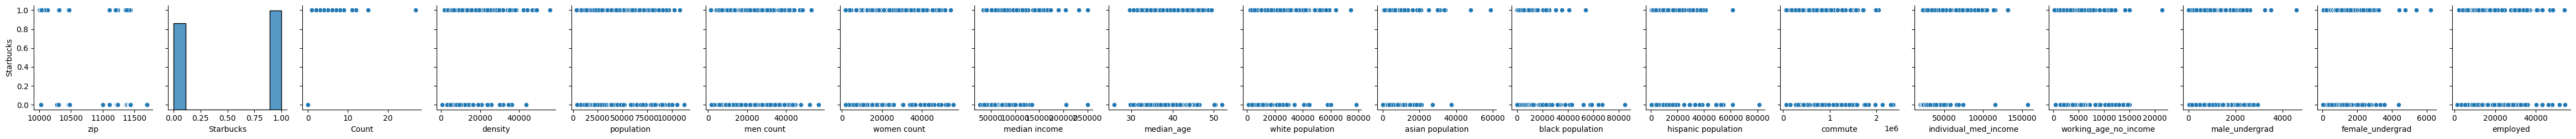

In [11]:
import seaborn as sns

sns.pairplot(merged_df, y_vars = ['Starbucks'])

Which is the zip code with the most Starbucks?

In [12]:
max_count = merged_df['Count'].max()
max_row = merged_df[merged_df['Count']==max_count]
max_row # Just below central park (West)

,zip,Starbucks,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
81,10019,1,27,25060.6,42766.0,24381,21140,113335,41.4,30126,8496,2453,8011,724260,79646,3034,870,759,29007


Which is the densest zip code?

In [13]:
max_count = merged_df['density'].max()
max_row = merged_df[merged_df['density']==max_count]
max_row # Upper East Side

,zip,Starbucks,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
94,10028,1,6,55757.7,45717.0,21263,26699,160244,41.6,40441,4990,847,3548,849455,101436,2758,209,662,28542


Which zip code has the greatest population?

In [14]:
max_count = merged_df['population'].max()
max_row = merged_df[merged_df['population']==max_count]
max_row # Queens

,zip,Starbucks,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
53,11368,0,0,16529.7,112750.0,56848,51813,69391,34.6,34083,14467,10529,81431,2347590,29941,14728,2708,2656,51495


See zip codes by descending order of Starbucks locations

In [15]:
sorted_df = merged_df.sort_values(by='Count', ascending=False)

sorted_df

,zip,Starbucks,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
81,10019,1,27,25060.6,42766.0,24381,21140,113335,41.4,30126,8496,2453,8011,724260,79646,3034,870,759,29007
83,10001,1,15,16713.6,27004.0,12265,12761,106509,35.7,15880,5201,1619,3925,392715,72740,1986,516,1226,15725
82,10017,1,15,18775.3,14486.0,7236,8829,139964,41.2,11723,3240,437,686,259250,89727,918,125,30,10763
84,10036,1,12,26702.0,30930.0,15190,13041,102287,39.3,17606,5529,1928,4991,531590,66343,1643,306,476,18873
85,10003,1,11,36392.4,53877.0,26671,28000,152863,32.2,39951,8244,2759,4732,752985,78110,7972,4586,6244,32555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,11370,0,0,7045.4,28164.0,17268,12098,71618,39.0,12548,6863,4374,10689,429000,34746,8880,934,892,9402
56,11378,0,0,6224.1,39250.0,19314,19719,90572,39.8,25460,4811,597,13158,749250,42083,5792,1027,1171,18588
57,11379,0,0,6667.6,38261.0,18024,19756,89500,44.9,28321,4356,377,7983,805240,43814,4031,748,1030,18653
58,11385,0,0,11269.9,105521.0,52172,52853,85127,36.0,78232,6338,2853,49040,2307235,41912,14669,2782,3096,54390


See Mean and Median of all zip codes (by whether or not they have Starbucks locations)

In [16]:
average_by_starbucks = merged_df.groupby('Starbucks').mean()
average_by_starbucks

,zip,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
Starbucks,,,,,,,,,,,,,,,,,,
0,11039.790123,0.000000,14237.751852,50069.444444,23104.802469,25469.641975,78756.283951,38.425926,14638.814815,5549.913580,17218.728395,15515.382716,935962.283951,39754.000000,6983.049383,1233.938272,1539.777778,21210.543210
1,10619.053763,3.225806,19786.293548,48296.064516,22727.677419,24779.720430,101903.440860,39.047312,24329.408602,7958.870968,6457.279570,12503.118280,880771.881720,56909.892473,5777.161290,1112.591398,1422.032258,23585.268817


In [17]:
average_by_starbucks = merged_df.groupby('Starbucks').median()
average_by_starbucks

,zip,Count,density,population,men count,women count,median income,median_age,white population,asian population,black population,hispanic population,commute,individual_med_income,working_age_no_income,male_undergrad,female_undergrad,employed
Starbucks,,,,,,,,,,,,,,,,,,
0,11226.0,0.0,11269.9,43286.0,19114.0,21303.0,76731.0,37.3,11088.0,2826.0,11223.0,8857.0,796705.0,36680.0,5912.0,1128.0,1389.0,18653.0
1,10458.0,2.0,18114.7,46311.0,21263.0,23279.0,94824.0,38.7,21237.0,5056.0,2453.0,7607.0,849455.0,47760.0,5101.0,870.0,1136.0,23024.0


Observe that although population is more or less similar, racial population is starkly different among zip codes with and without Starbucks

# Supervised Learning

In [18]:
# Setup: packages (may be duplicated packages like pd in case
# user did not run code from above)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Logistic Regression

In [19]:
X = merged_df.drop(['Starbucks','Count'], axis=1)
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.64      0.60      0.62        15

    accuracy                           0.69        35
   macro avg       0.68      0.68      0.68        35
weighted avg       0.68      0.69      0.68        35

Confusion Matrix:
[[15  5]
 [ 6  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression with Regularization

In [20]:
X = merged_df.drop(['Starbucks', 'Count'], axis=1)
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.64      0.60      0.62        15

    accuracy                           0.69        35
   macro avg       0.68      0.68      0.68        35
weighted avg       0.68      0.69      0.68        35

Confusion Matrix:
[[15  5]
 [ 6  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### L2 Regularization (Ridge) with Logistic Regression

In [26]:
X = merged_df.drop(['Starbucks', 'Count'], axis=1)
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.64      0.60      0.62        15

    accuracy                           0.69        35
   macro avg       0.68      0.68      0.68        35
weighted avg       0.68      0.69      0.68        35

Confusion Matrix:
[[15  5]
 [ 6  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
coefficients = model.coef_
feature_names = merged_df.drop(['Starbucks', 'Count'],axis =1).columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

print(coefficients_df)

                  Feature   Coefficient
0                     zip -1.284113e-04
1                 density -9.035730e-06
2              population -2.934105e-05
3               men count -9.409943e-05
4             women count  1.383961e-04
5           median income -8.811060e-06
6              median_age  1.517987e-07
7        white population  6.685950e-06
8        asian population -3.221653e-07
9        black population -5.323567e-05
10    hispanic population  4.039555e-06
11                commute -5.648451e-06
12  individual_med_income  3.096971e-05
13  working_age_no_income -7.881367e-05
14         male_undergrad  5.860316e-06
15       female_undergrad  3.744642e-05
16               employed  3.270465e-04


Three highest-coefficient features in this model are: employment, # of women, zip code

In [28]:
coefficients_df.loc[coefficients_df['Coefficient'].abs().nlargest(3).index]

,Feature,Coefficient
16,employed,0.000327
4,women count,0.000138
0,zip,-0.000128


#### L1 Regularization (Lasso) with Logistic Regression

In [32]:
X = merged_df.drop(['Starbucks', 'Count'], axis=1)
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.62      0.67      0.65        15

    accuracy                           0.69        35
   macro avg       0.68      0.68      0.68        35
weighted avg       0.69      0.69      0.69        35

Confusion Matrix:
[[14  6]
 [ 5 10]]


In [35]:
coefficients = model.coef_
feature_names = merged_df.drop(['Starbucks', 'Count'],axis =1).columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

print(coefficients_df)

                  Feature  Coefficient
0                     zip    -0.000426
1                 density    -0.000013
2              population     0.000039
3               men count    -0.000393
4             women count     0.000234
5           median income    -0.000017
6              median_age     0.087699
7        white population    -0.000042
8        asian population    -0.000071
9        black population    -0.000137
10    hispanic population    -0.000025
11                commute    -0.000006
12  individual_med_income     0.000041
13  working_age_no_income     0.000178
14         male_undergrad     0.000239
15       female_undergrad    -0.000016
16               employed     0.000430


Three highest-coefficient features in this model are: median_age (very high coefficient), employment, zip code

In [36]:
coefficients_df.loc[coefficients_df['Coefficient'].abs().nlargest(3).index]

,Feature,Coefficient
6,median_age,0.087699
16,employed,0.000430
0,zip,-0.000426


#### Linear Regression with Threshold

In [46]:
X = merged_df.drop(['Starbucks', 'Count'], axis=1)
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = [1 if x >= threshold else 0 for x in predictions]

# Evaluate the model
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.79      0.73      0.76        15

    accuracy                           0.80        35
   macro avg       0.80      0.79      0.79        35
weighted avg       0.80      0.80      0.80        35

Confusion Matrix:
[[17  3]
 [ 4 11]]


In [38]:
coefficients = model.coef_
feature_names = merged_df.drop(['Starbucks', 'Count'],axis =1).columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})
print(coefficients_df)

                  Feature  Coefficient
0                     zip    -0.000299
1                 density    -0.000299
2              population    -0.000299
3               men count    -0.000299
4             women count    -0.000299
5           median income    -0.000299
6              median_age    -0.000299
7        white population    -0.000299
8        asian population    -0.000299
9        black population    -0.000299
10    hispanic population    -0.000299
11                commute    -0.000299
12  individual_med_income    -0.000299
13  working_age_no_income    -0.000299
14         male_undergrad    -0.000299
15       female_undergrad    -0.000299
16               employed    -0.000299


#### Decision Tree

In [51]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
val_score = model.score(X_val, y_val)
print("Validation Accuracy is ", val_score)
test_score = model.score(X_test, y_test)
print("Test Accuracy is ", test_score)

y_test_pred = model.predict(X_test)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)

Validation Accuracy is  0.8285714285714286
Test Accuracy is  0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        20
           1       0.50      0.40      0.44        15

    accuracy                           0.57        35
   macro avg       0.55      0.55      0.55        35
weighted avg       0.56      0.57      0.56        35

Confusion Matrix (Test):
 [[14  6]
 [ 9  6]]


Visualizing this decision tree:

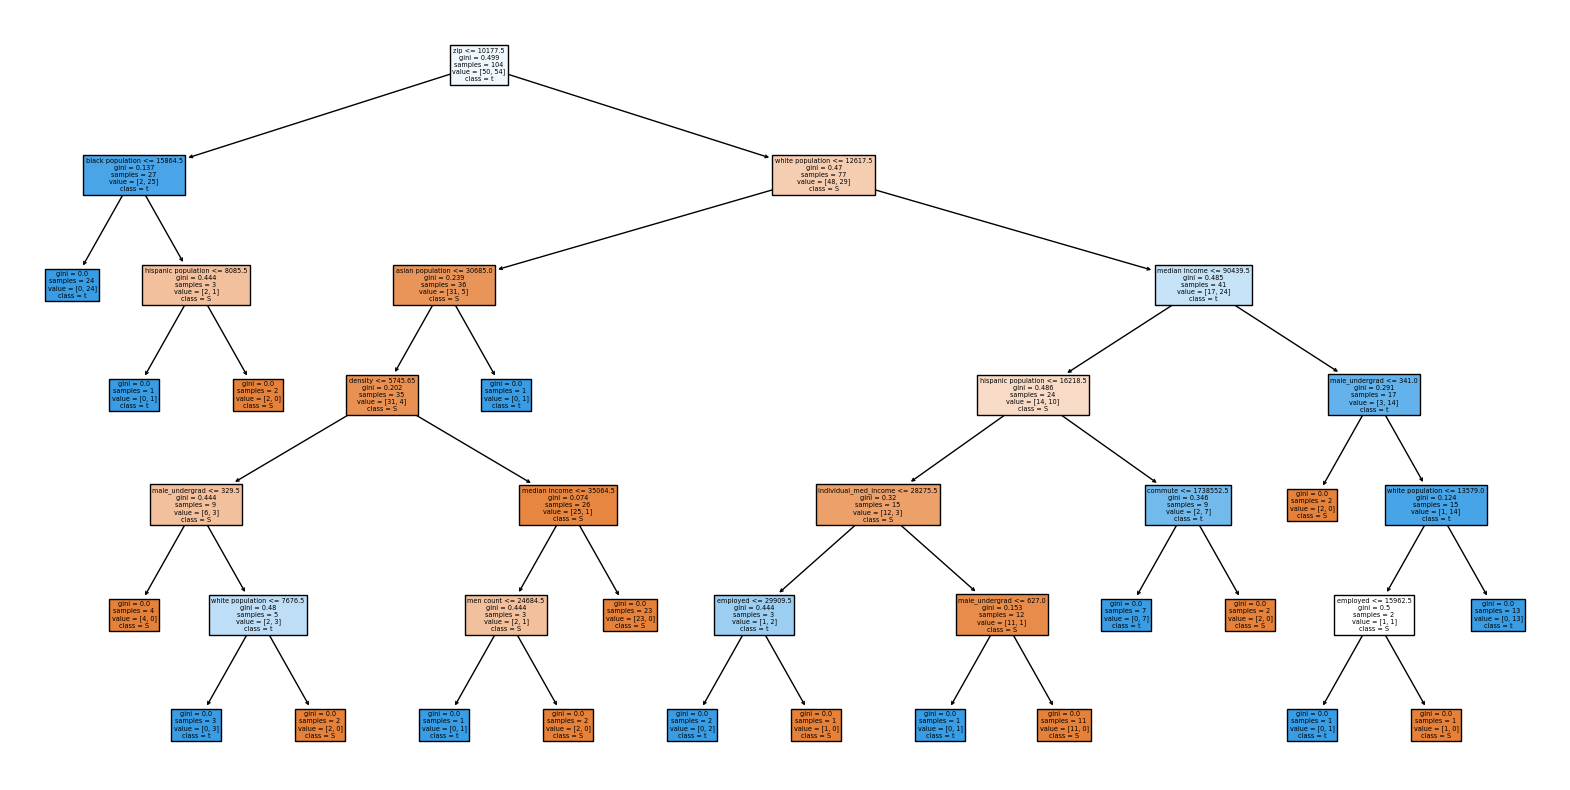

In [52]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=feature_names, class_names='Starbucks')
plt.show()

#### Pruned Decision Tree

In [55]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth = 1)
model.fit(X_train, y_train)

print("Validation Accuracy is ", val_score)
test_score = model.score(X_test, y_test)
print("Test Accuracy is ", test_score)


y_test_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)

Validation Accuracy is  0.8285714285714286
Test Accuracy is  0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       1.00      0.33      0.50        15

    accuracy                           0.71        35
   macro avg       0.83      0.67      0.65        35
weighted avg       0.81      0.71      0.67        35

Confusion Matrix (Test):
 [[20  0]
 [10  5]]


In [57]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth = 2)
model.fit(X_train, y_train)

print("Validation Accuracy is ", val_score)
test_score = model.score(X_test, y_test)

y_test_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)
print("Test Accuracy is ", test_score)

Validation Accuracy is  0.8285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.57      0.80      0.67        15

    accuracy                           0.66        35
   macro avg       0.68      0.68      0.66        35
weighted avg       0.69      0.66      0.66        35

Confusion Matrix (Test):
 [[11  9]
 [ 3 12]]
Test Accuracy is  0.6571428571428571


(UPDATE FROM PAPER) Upon trying multiple numbers, it was clear that max_depth of 1 was the best, which tells us that Decision Tree is definitely not the best method of analysis (and that zip code is much more indicative than other variables). Additionally, the fact that with max_depth of 1 all of the predictions for zipcodes with existing Starbucks was correct tells us that zip code is extremely indicative of a variable.

#### Random Forest

In [58]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

val_score = model.score(X_val, y_val)
print("Validation Accuracy is", val_score)

test_score = model.score(X_test, y_test)
print("Test Accuracy is", test_score)

y_test_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)

Validation Accuracy is 0.8571428571428571
Test Accuracy is 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.70      0.47      0.56        15

    accuracy                           0.69        35
   macro avg       0.69      0.66      0.66        35
weighted avg       0.69      0.69      0.67        35

Confusion Matrix (Test):
 [[17  3]
 [ 8  7]]


In [59]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

val_score = model.score(X_val, y_val)
print("Validation Accuracy is", val_score)

test_score = model.score(X_test, y_test)
print("Test Accuracy is", test_score)

Validation Accuracy is 0.8571428571428571
Test Accuracy is 0.6857142857142857


In [ ]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=5000, random_state=42)
model.fit(X_train, y_train)

val_score = model.score(X_val, y_val)
print("Validation Accuracy is", val_score)

test_score = model.score(X_test, y_test)
print("Test Accuracy is", test_score)

Number of trees does not help; it is confirmed that decision trees are not a good model for this dataset

#### Neural Networks

In [62]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_val_normalized = tf.keras.utils.normalize(X_val, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_val_normalized, y_val))
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)
print("Test Accuracy is ", test_accuracy)

Epoch 1/10
4/4 [==============================] - 2s 115ms/step - loss: 0.6915 - accuracy: 0.5192 - val_loss: 0.6766 - val_accuracy: 0.6857
Epoch 2/10
4/4 [==============================] - 0s 23ms/step - loss: 0.6898 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.7143
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 0.6897 - accuracy: 0.5577 - val_loss: 0.6843 - val_accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6888 - accuracy: 0.5769 - val_loss: 0.6846 - val_accuracy: 0.5714
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6889 - accuracy: 0.5673 - val_loss: 0.6881 - val_accuracy: 0.5143
Epoch 6/10
4/4 [==============================] - 0s 24ms/step - loss: 0.6882 - accuracy: 0.5865 - val_loss: 0.6873 - val_accuracy: 0.5429
Epoch 7/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6877 - accuracy: 0.5865 - val_loss: 0.6873 - val_accuracy: 0.5143
Epoch 8/10
4/4 [==========

#### Linear Discriminant Analysis

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred = lda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is", accuracy)

y_test_pred = lda_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)

Accuracy is 0.7428571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.73      0.69      0.71        16

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35

Confusion Matrix (Test):
 [[15  4]
 [ 5 11]]


#### Quadratic Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [72]:
X = merged_df.drop(columns=['Starbucks', 'Count'])
y = merged_df['Starbucks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is", accuracy)

y_test_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", conf_matrix_test)

Accuracy is 0.7428571428571429
2/2 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        19
           1       0.42      0.50      0.46        16

    accuracy                           0.46        35
   macro avg       0.46      0.46      0.46        35
weighted avg       0.46      0.46      0.46        35

Confusion Matrix (Test):
 [[ 8 11]
 [ 8  8]]


# Unsupervised Learning

In [150]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [151]:
# Load dataframe: Median age of population
MTA_Subway_Stations = pd.read_csv('/content/drive/MyDrive/SML312/US_Learning/MTA_Subway_Stations.csv')
MTA_Subway_Stations = MTA_Subway_Stations.rename(columns={'GTFS Latitude':'latitude', 'GTFS Longitude':'longitude'})

In [152]:
len(MTA_Subway_Stations) # 496 MTA subway stations

496

One-hot encoding: subway stations as (0) and Starbucks locations as (1)

In [153]:
# Dataframe with long and latitudes of Starbucks locations
sb_locations = pd.read_csv('/content/drive/MyDrive/SML312/starbucks_locations')
sb_locations

,city_x,name,country,longitude,latitude,storeId,storeHours,zip_code,population_x,city_y,zcta,population_y,density,county_fips
0,Brooklyn,Target Brooklyn College,US,-73.947243,40.631264,6551,"{'sunday': '8:00 AM to 9:00 PM', 'monday': '8:...",11210,64665.0,Brooklyn,True,63426.0,14852.8,36047
1,Brooklyn,33-42 Hillel Place,US,-73.948570,40.632339,8328,NaN,11210,64665.0,Brooklyn,True,63426.0,14852.8,36047
2,Kew Gardens,118-24 Queens Blvd,US,-73.831879,40.714371,6348,"{'sunday': '6:00 AM to 8:00 PM', 'monday': '5:...",11375,73034.0,Forest Hills,True,75212.0,11996.4,36081
3,Forest Hills,Queens Blvd & 67th Rd,US,-73.852776,40.726261,12870,"{'sunday': '6:00 AM to 9:30 PM', 'monday': '5:...",11375,73034.0,Forest Hills,True,75212.0,11996.4,36081
4,Forest Hills,107-12 Continental Avenue,US,-73.844444,40.720440,13497,NaN,11375,73034.0,Forest Hills,True,75212.0,11996.4,36081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Bronx,161st & Morris Ave,US,-73.919052,40.825603,1013054,"{'sunday': '6:00 AM to 8:00 PM', 'monday': '5:...",10451,48136.0,Bronx,True,51311.0,18757.2,36005
302,Jamaica,89th Ave & Sutphin Blvd.,US,-73.808823,40.703541,1014349,"{'sunday': '6:00 AM to 9:00 PM', 'monday': '6:...",11435,59605.0,Jamaica,True,59961.0,15325.2,36081
303,Rego Park,92-77 Queens Blvd,US,-73.866524,40.732189,1008876,"{'sunday': '5:30 AM to 12:00 AM', 'monday': '5...",11374,43507.0,Rego Park,True,47230.0,19316.3,36081
304,Rego Park,95-17 63rd Drive,US,-73.862755,40.729809,1009778,"{'sunday': '6:00 AM to 9:30 PM', 'monday': '5:...",11374,43507.0,Rego Park,True,47230.0,19316.3,36081


In [154]:
MTA_Subway_Stations['type'] = 0 #
sb_locations['type']=1

#### Visualize Starbucks locations

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


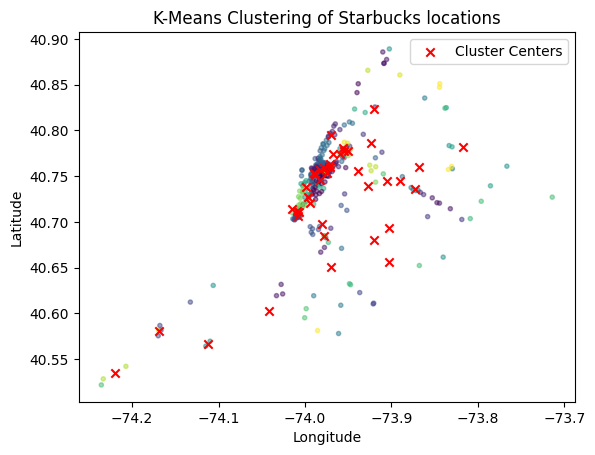

In [155]:
data = sb_locations[['longitude','latitude','zip_code','density', 'population_y']]

# Run K-Means
kmeans = KMeans(n_clusters=40)
kmeans.fit(data)

# Get cluster centers & labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data['longitude'], data['latitude'], c=labels, cmap='viridis', alpha=0.5, marker='.')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Starbucks locations')
plt.legend()
plt.show()

#### Visualize Starbucks locations by density (for comparison with K-Means chart)

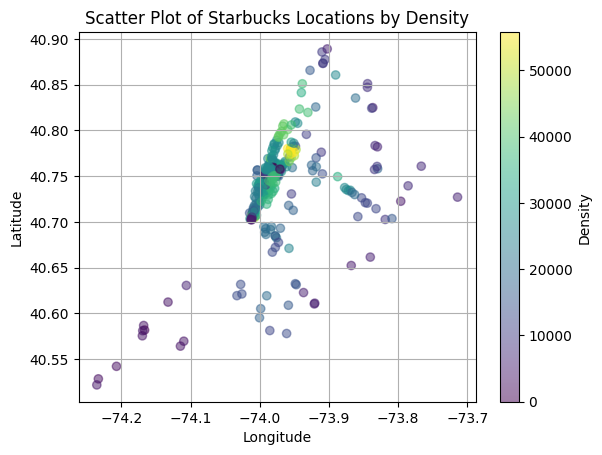

In [156]:
data = sb_locations[['longitude','latitude','zip_code','density']]

# Create a scatter plot with color mapped by density
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['density'], cmap='viridis', alpha = 0.5)
plt.colorbar(label='Density')

plt.title('Scatter Plot of Starbucks Locations by Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

#### Visualize MTA Stations

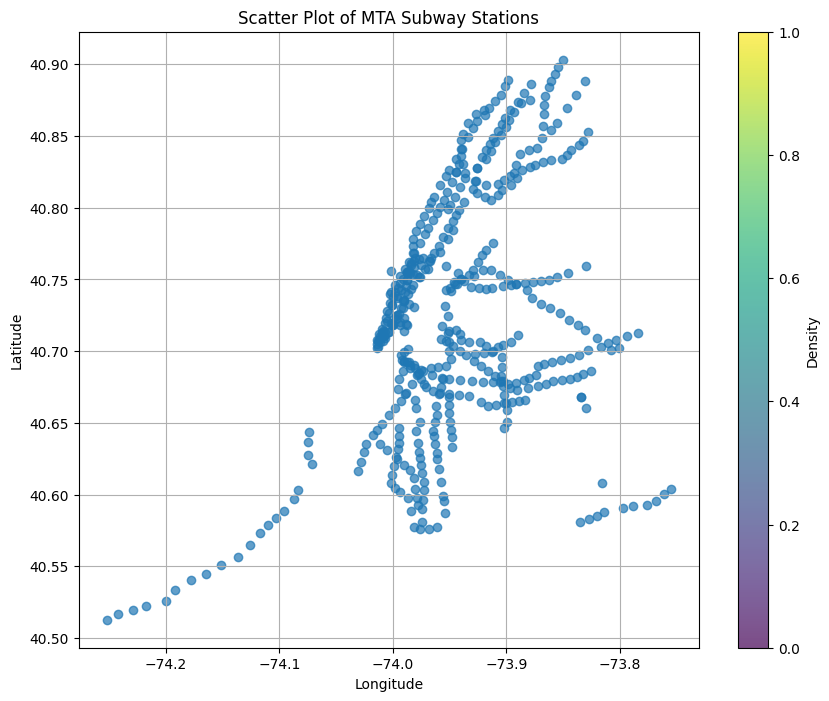

In [157]:
plt.figure(figsize=(10, 8))
plt.scatter(MTA_Subway_Stations['longitude'], MTA_Subway_Stations['latitude'], alpha=0.7)
plt.colorbar(label='Density')
plt.title('Scatter Plot of MTA Subway Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

#### Cluster both Subway Stations and Starbucks Locations

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: 'c' argument has 306 elements, which is inconsistent with 'x' and 'y' with size 802.

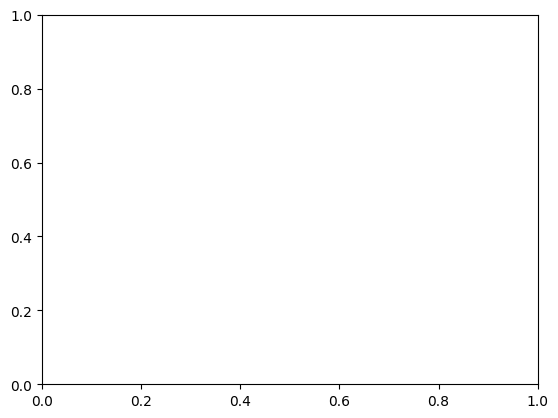

In [158]:
data = pd.concat([MTA_Subway_Stations[['latitude', 'longitude', 'type']], sb_locations[['latitude', 'longitude', 'type']]], ignore_index=True)

kmeans = KMeans(n_clusters=400)
kmeans.fit(data)

# Plot the data points and cluster centers
plt.scatter(data['longitude'], data['latitude'], c=labels, cmap='viridis', alpha=0.5, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Latitude and Longitude Data')
plt.legend()
plt.show()

In [ ]:
# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Latitude and Longitude Data: Cluster Centers')
plt.legend()
plt.show()


#### Analysis of K-Means

Are they evenly distributed? We one-hot encoded Starbucks locations (label 1, count 306) and MTA Stations (label 0, count 496), which is about a 0.6-1 ratio. Thus, if we K-Means cluster it and find the sum of each cluster, the ratio should be around 0.6 if the closest entity (station or Starbucks) between each subway station and Starbucks is each other.

In [ ]:
labels = kmeans.labels_
data['Cluster'] = labels
sum_cluster_labels = data.groupby('Cluster')['type'].sum()

In [ ]:
sum_cluster_labels.mean() # Quite close to 0.6

#### More K-Means Attempts of Clustering

In [ ]:
data = pd.concat([MTA_Subway_Stations[['latitude', 'longitude', 'type']], sb_locations[['latitude', 'longitude', 'type']]], ignore_index=True)

kmeans = KMeans(n_clusters=200)
kmeans.fit(data)

plt.scatter(data['longitude'], data['latitude'], c=labels, cmap='viridis', alpha=0.5, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Latitude and Longitude Data')
plt.legend()
plt.show()

In [ ]:
labels = kmeans.labels_

data['Cluster'] = labels
sum_cluster_labels = data.groupby('Cluster')['type'].sum()
sum_cluster_labels.mean() # Quite close to 1.2 expected